# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari
from keras.datasets import cifar100,cifar10


Using TensorFlow backend.


In [2]:
RUN_ID = '0016'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 7
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data(label_mode='fine')

mask = [y[0]==label for y in y_train]

x_train = x_train[mask]
y_train = y_train[mask]

## architecture

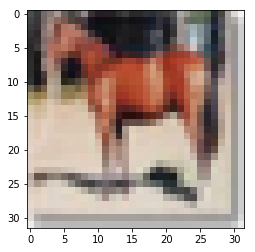

In [4]:
plt.imshow(x_train[200,:,:,:])

In [5]:
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5


In [6]:
print(np.min(x_train[0]))
print(np.max(x_train[0]))

-0.92941177
0.94509804


In [7]:
x_train.shape

(5000, 32, 32, 3)

In [8]:
gan = GAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [32,64,128,256]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,2]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = 0.9
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.0005 #0.0002 #
        , generator_initial_dense_layer_size = (2,2,256)
        , generator_use_upsampling = [False,False, False,False]
        , generator_conv_t_filters = [128,64, 32,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [2,2,2,2]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0005 #0.0002 #
        , optimiser = 'adam'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [9]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [10]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
__________

In [11]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              103424    
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 256)         0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 4, 4, 128)         819328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 128)         512       
__________

## training

In [12]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.979434] [D acc: 0.203125] [G loss: 0.666885] [G acc: 0.632812]
1 [D loss: 4.463055] [D acc: 0.246094] [G loss: 0.000619] [G acc: 1.000000]
2 [D loss: 4.457185] [D acc: 0.226562] [G loss: 0.000519] [G acc: 1.000000]
3 [D loss: 4.464030] [D acc: 0.250000] [G loss: 0.000443] [G acc: 1.000000]
4 [D loss: 4.517453] [D acc: 0.203125] [G loss: 0.000404] [G acc: 1.000000]
5 [D loss: 4.564306] [D acc: 0.203125] [G loss: 0.000343] [G acc: 1.000000]
6 [D loss: 4.697560] [D acc: 0.226562] [G loss: 0.000281] [G acc: 1.000000]
7 [D loss: 4.668487] [D acc: 0.203125] [G loss: 0.000274] [G acc: 1.000000]
8 [D loss: 4.724884] [D acc: 0.210938] [G loss: 0.000238] [G acc: 1.000000]
9 [D loss: 4.705108] [D acc: 0.230469] [G loss: 0.000234] [G acc: 1.000000]
10 [D loss: 4.764194] [D acc: 0.234375] [G loss: 0.000190] [G acc: 1.000000]
11 [D loss: 4.788761] [D acc: 0.210938] [G loss: 0.000183] [G acc: 1.000000]
12 [D loss: 4.821237] [D acc: 0.230469] [G loss: 0.000172] [G acc: 1.000000]
13 [D los

KeyboardInterrupt: 

In [ ]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [ ]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))